## Logistic Regression - ROI Features

In [19]:
import numpy as np
import pickle
import scipy as scp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

In [20]:
with open('HCP_movie_watching.pkl','rb') as f:
    TS = pickle.load(f)

testIndex = np.random.randint(0, 176, 76)

In [21]:
def splitData(tList):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    for row in tList:
        if row[-1] in testIndex:
            X_test.append(row[:-2])
            y_test.append(row[-2])
        else:
            X_train.append(row[:-2])
            y_train.append(row[-2])

    X_train = np.array(X_train).astype(float)
    X_train = (X_train - np.mean(X_train)) / np.std(X_train)

    X_test = np.array(X_test).astype(float)
    X_test = (X_test - np.mean(X_test)) / np.std(X_test)
    
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    return X_train, X_test, y_train, y_test
    

In [22]:
"""
def cost(X, Y, W):
    h = 1 / (1 + np.exp(-np.dot(X, W))) # hypothesis representation
    cost = np.dot(Y, -np.log(h)) + np.dot((1-Y), np.log(1-h)) # cost function
    J = -1 / (len(X)) * np.sum(cost) # mean cost
    return J
def gradient(X, Y, W):
    h = 1 / (1 + np.exp(-np.dot(X, W)))
    diff = h - Y
    grad = 1 / (len(X)) * np.dot(diff, X)
    return grad
def descent(X_train, Y_train, lr = 0.01):
    weights = [0]*(len(X_train[0]))
    loss = []
    loss.append(cost(X_train, Y_train, weights))
    count = 0
    while count < 1000:
        grad = gradient(X_train, Y_train, weights)
        weights = weights - lr*grad
        loss.append(cost(X_train, Y_train, weights))
        count += 1

    return weights

def createYMask(movie, Y):
    yMasked = np.zeros(Y.shape)
    mask = Y == movie
    yMasked[mask] = 1
    return yMasked

def sigmoid(X, W):
    return 1 / (1 + np.exp(-np.dot(X, W)))

def runModel(X_train, X_test, y_train, y_test):
    movieList = list(TS.keys())
    modelWeights = []
    for movie in movieList:
        yMasked = createYMask(movie, y_train)
        W = descent(X_train, yMasked)
        modelWeights.append(W)

    predY = []
    for x in X_test:
        probList = [sigmoid(x, W) for W in modelWeights]
        predY.append(movieList[probList.index(max(probList))])

    pMask = y_test == predY # create mask for values where predicted is correct
    acc = sum(pMask) / len(pMask)
    return acc
"""

In [23]:
performAcc = []

# Run log reg for first 90 time series
for k in range(90):
    timepoints = []     # 2d arrays: one row per (subject, clip) combination
    for key, val in TS.items():
        if val.shape[-2] > k:
            if key == 'testretest':
                for i in range(val.shape[0]):
                    for j in range(val.shape[-3]):
                        subj = []
                        for l in range(val.shape[-1]):
                            subj.append(val[i][j][k][l])
                        subj.append(key)
                        subj.append(j)
                        timepoints.append(subj)
            else:
                for j in range(val.shape[-3]):
                    subj = []
                    for l in range(val.shape[-1]):
                        subj.append(val[j][k][l])
                    subj.append(key)
                    subj.append(j)
                    timepoints.append(subj)
        
    X_train, X_test, y_train, y_test = splitData(timepoints)

    model = LogisticRegression(multi_class='ovr', max_iter = 1000)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    #acc = runModel(X_train, X_test, y_train, y_test)
    performAcc.append(acc)


[0.23835125448028674, 0.25, 0.2661290322580645, 0.28136200716845877, 0.40053763440860213, 0.47043010752688175, 0.5824372759856631, 0.6290322580645161, 0.6370967741935484, 0.6388888888888888, 0.6460573476702509, 0.6317204301075269, 0.6657706093189965, 0.6845878136200717, 0.692652329749104, 0.6881720430107527, 0.6980286738351255, 0.703405017921147, 0.7168458781362007, 0.7598566308243727, 0.7589605734767025, 0.760752688172043, 0.7580645161290323, 0.7652329749103942, 0.7347670250896058, 0.7231182795698925, 0.735663082437276, 0.7553763440860215, 0.775089605734767, 0.753584229390681, 0.7813620071684588, 0.7804659498207885, 0.782258064516129, 0.7768817204301075, 0.7455197132616488, 0.7741935483870968, 0.7732974910394266, 0.771505376344086, 0.7768817204301075, 0.764336917562724, 0.7329749103942652, 0.7043010752688172, 0.7517921146953405, 0.7625448028673835, 0.7732974910394266, 0.767921146953405, 0.7885304659498208, 0.793010752688172, 0.7956989247311828, 0.7876344086021505, 0.78584229390681, 0.

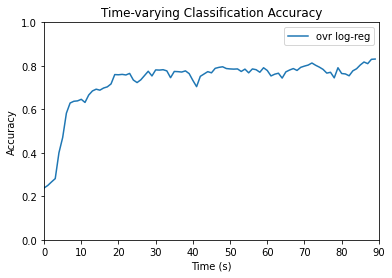

In [26]:
xAx = [i for i in range(0,90)]
plt.plot(xAx, performAcc, label="ovr log-reg")
plt.xlabel("Time (s)")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.xlim(0,90)
plt.title("Time-varying Classification Accuracy")
plt.legend()
plt.show()